In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('../input/fake-news-data/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.shape

(20800, 5)

In [6]:
###Drop Nan Values
df=df.dropna()

In [7]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [8]:
## Get the Dependent features
y=df['label']

In [9]:
X.shape, y.shape

((18285, 4), (18285,))

In [10]:
import tensorflow as tf
tf.__version__

'2.6.4'

In [11]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [12]:
### Vocabulary size
voc_size=5000

# one hot representation

In [13]:
messages=X.copy()

In [14]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [15]:
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [16]:
import nltk
import re
from nltk.corpus import stopwords
messages.reset_index(inplace=True)

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [19]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [20]:
onehot_repr=[one_hot(sent,voc_size)for sent in corpus] 
onehot_repr[:10]

[[4005, 3331, 3288, 4210, 1367, 4921, 720, 2253, 1233, 196],
 [3596, 4303, 4858, 834, 4789, 4708, 4683],
 [1136, 4630, 28, 684],
 [1321, 949, 150, 554, 3572, 77],
 [4251, 4789, 2056, 4700, 3898, 95, 4789, 526, 2515, 3147],
 [2399,
  1283,
  2949,
  2914,
  3094,
  2392,
  3146,
  580,
  1199,
  821,
  4364,
  2399,
  1730,
  3925,
  4683],
 [4832, 4016, 2333, 1098, 3132, 4802, 529, 1444, 406, 4091, 4503],
 [1338, 970, 4343, 4632, 317, 3761, 2392, 1226, 406, 4091, 4503],
 [4013, 234, 434, 438, 4465, 1586, 4642, 148, 2392, 469],
 [3487, 1112, 1215, 4496, 2675, 3459, 1564, 1648]]

# Embedding representation

In [21]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2253 1233  196]
 [   0    0    0 ... 4789 4708 4683]
 [   0    0    0 ... 4630   28  684]
 ...
 [   0    0    0 ...  406 4091 4503]
 [   0    0    0 ...   89 3653  985]
 [   0    0    0 ... 2659 2773 4889]]


In [22]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(8,activation='relu')),
model.add(Dense(1,activation='sigmoid')),
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy'])

2022-07-31 23:27:37.940544: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
len(embedded_docs),y.shape

(18285, (18285,))

In [24]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [25]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [26]:
X_train, y_train = X_final[:15000], y_final[:15000]
X_valid, y_valid = X_final[15000:16700], y_final[15000:16700]
X_test, y_test = X_final[16700:], y_final[16700:]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((15000, 20), (15000,), (1700, 20), (1700,), (1585, 20), (1585,))

2022-07-31 23:27:38.556733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
118/118 [==============================] - 8s 43ms/step - loss: 0.3970 - binary_accuracy: 0.7947 - val_loss: 0.2194 - val_binary_accuracy: 0.9012
Epoch 2/20
118/118 [==============================] - 5s 39ms/step - loss: 0.1727 - binary_accuracy: 0.9288 - val_loss: 0.2035 - val_binary_accuracy: 0.9076
Epoch 3/20
118/118 [==============================] - 5s 39ms/step - loss: 0.1253 - binary_accuracy: 0.9533 - val_loss: 0.2108 - val_binary_accuracy: 0.9165
Epoch 4/20
118/118 [==============================] - 5s 39ms/step - loss: 0.0979 - binary_accuracy: 0.9643 - val_loss: 0.2314 - val_binary_accuracy: 0.9188
Epoch 5/20
118/118 [==============================] - 5s 46ms/step - loss: 0.0726 - binary_accuracy: 0.9741 - val_loss: 0.2278 - val_binary_accuracy: 0.9100
Epoch 6/20
118/118 [==============================] - 5s 39ms/step - loss: 0.0591 - binary_accuracy: 0.9803 - val_loss: 0.2711 - val_binary_accuracy: 0.9147
Epoch 7/20
118/118 [==============================] - 5s 3

<AxesSubplot:title={'center':'Accuracy'}>

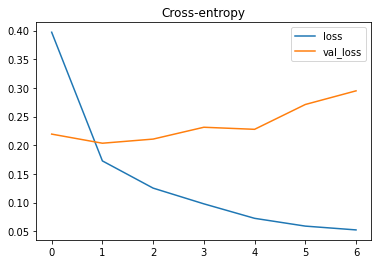

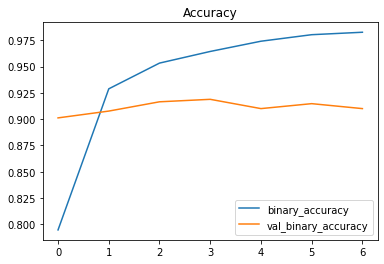

In [27]:
from tensorflow import keras
### Finally Training
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=20,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [28]:
y_predict=model.predict(X_test) 
y_predict

array([[2.9485822e-03],
       [1.1251867e-03],
       [1.0558367e-03],
       ...,
       [5.3369999e-04],
       [9.4280243e-01],
       [8.7648338e-01]], dtype=float32)

In [29]:
y_predict=(y_predict > 0.5).astype("int32")
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,y_predict)

array([[793,  70],
       [ 89, 633]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8996845425867508